In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import math

**DATA PREPROCESSING**

In [134]:
with open('dataset/data.csv', 'r') as f:
    print(f.readline().replace('\n','').split(','))

['Country name', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']


In [135]:
# Create 2-D array "data"
data = []
with open('dataset/data.csv', 'r') as f:
    line = f.readline()
    line = line.replace('\n', '').split(',')
    data.append(line)
    for line in f.readlines():
        line = line.replace('\n', '').split(',')
        line_int = [line[0]]
        for i in range(1,len(line)):
            if line[i] == '':
                line_int.append(0.0)
                continue
            line_int.append(float(line[i]))
        data.append(line_int)


In [136]:
# Create "dataframe"
dataframe = pd.DataFrame(data[1:], columns = data[0])

In [137]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35], 'gender': ['F', 'M', 'M']})

# find the row number(s) where age is equal to 30
row_num = df.loc[df['age'] == 25].index[0]
print(row_num)

0


**NAIVE**

/var/folders/kd/k2fmn5590c3g3b92s89c6fl80000gn/T/ipykernel_4470/4130020273.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labels_0, rotation=90)
/var/folders/kd/k2fmn5590c3g3b92s89c6fl80000gn/T/ipykernel_4470/4130020273.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels_1, rotation=90)


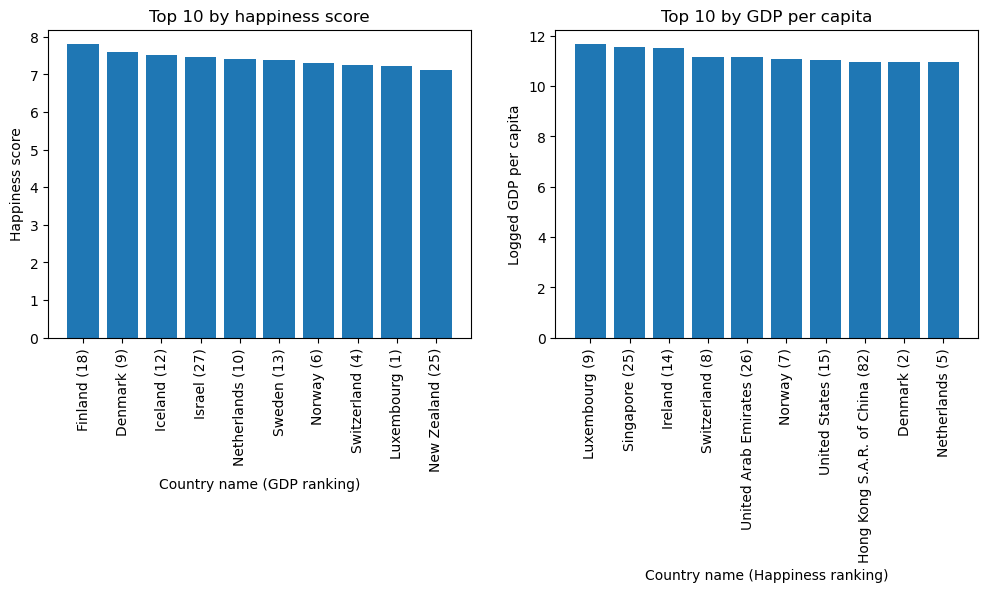

In [138]:
# 4 top 10 plots
top_ten_happiness = dataframe.head(10)

sorted_df_gdp = dataframe.sort_values(by='Logged GDP per capita', ascending=False)
sorted_df_gdp = sorted_df_gdp.reset_index(drop=True)
top_ten_gdp = sorted_df_gdp.head(10)

# dataframe['GDP to happiness ratio'] = (math.e**dataframe['Logged GDP per capita'])/dataframe['Ladder score']
dataframe['GDP to happiness ratio'] = (dataframe['Logged GDP per capita'])/dataframe['Ladder score']
sorted_df_ratio = dataframe.sort_values(by='GDP to happiness ratio', ascending=False)
top_ten_ratio = sorted_df_ratio.head(10)
sorted_df_ratio_reverse = dataframe.sort_values(by='GDP to happiness ratio', ascending=True)
last_ten_ratio = sorted_df_ratio_reverse.head(10)


fig, axs = plt.subplots(1, 2, figsize=(12,4))

labels_0 = [name+' ('+str(sorted_df_gdp.loc[sorted_df_gdp['Country name']==name].index[0]+1)+')' 
            for name in top_ten_happiness['Country name']]
axs[0].bar(top_ten_happiness['Country name'], top_ten_happiness['Ladder score'])
axs[0].set_ylabel('Happiness score')
axs[0].set_xlabel('Country name (GDP ranking)')
axs[0].set_title('Top 10 by happiness score')
axs[0].set_xticklabels(labels_0, rotation=90)

labels_1 = [name+' ('+str(dataframe.loc[dataframe['Country name']==name].index[0]+1)+')' 
            for name in top_ten_gdp['Country name']]
axs[1].bar(top_ten_gdp['Country name'], top_ten_gdp['Logged GDP per capita'])
axs[1].set_ylabel('Logged GDP per capita')
axs[1].set_xlabel('Country name (Happiness ranking)')
axs[1].set_title('Top 10 by GDP per capita')
axs[1].set_xticklabels(labels_1, rotation=90)

plt.show()

/var/folders/kd/k2fmn5590c3g3b92s89c6fl80000gn/T/ipykernel_4470/527220786.py:2: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0].get_shared_y_axes().join(axs[0], axs[1])


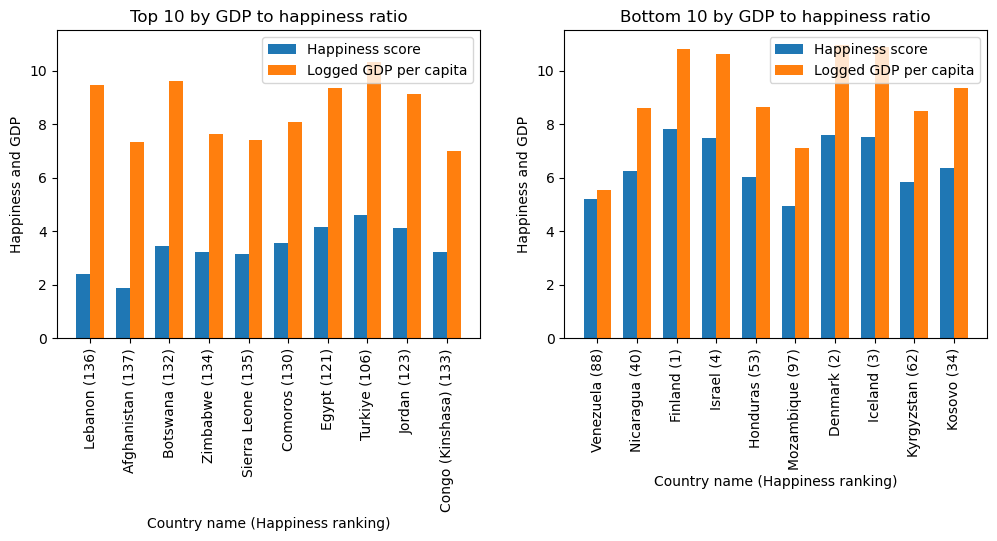

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].get_shared_y_axes().join(axs[0], axs[1])

labels_0 = [name+' ('+str(dataframe.loc[dataframe['Country name']==name].index[0]+1)+')' 
            for name in top_ten_ratio['Country name']]
index = [i for i in range(0,10)]
axs[0].bar(index, top_ten_ratio['Ladder score'], 0.35, label = "Happiness score")
# axs[1,0].bar([i+0.35 for i in index], math.e**top_ten_ratio['Logged GDP per capita'], 0.35, label='Logged GDP per capita')
axs[0].bar([i+0.35 for i in index], top_ten_ratio['Logged GDP per capita'], 0.35, label='Logged GDP per capita')
axs[0].set_ylabel('Happiness and GDP')
axs[0].set_xlabel('Country name (Happiness ranking)')
axs[0].set_title('Top 10 by GDP to happiness ratio')
axs[0].set_xticks([i+(0.35/2) for i in index])
axs[0].set_xticklabels(labels_0, rotation=90)
axs[0].legend()

labels_1 = [name+' ('+str(dataframe.loc[dataframe['Country name']==name].index[0]+1)+')' 
            for name in last_ten_ratio['Country name']]
axs[1].bar(index, last_ten_ratio['Ladder score'], 0.35, label = "Happiness score")
#axs[1,1].bar([i+0.35 for i in index], math.e**last_ten_ratio['Logged GDP per capita'], 0.35, label='Logged GDP per capita')
axs[1].bar([i+0.35 for i in index], last_ten_ratio['Logged GDP per capita'], 0.35, label='Logged GDP per capita')
axs[1].set_ylabel('Happiness and GDP')
axs[1].set_xlabel('Country name (Happiness ranking)')
axs[1].set_title('Bottom 10 by GDP to happiness ratio')
axs[1].set_xticks([i+(0.35/2) for i in index])
axs[1].set_xticklabels(labels_1, rotation=90)
axs[1].legend()

**DEEP LEARNING PREDICTION USING GDP**

In [140]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import save_model
from keras.models import load_model
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d

In [141]:
# Label regions of countries for future use
region_data = []
with open('dataset/country_region.csv', 'r') as f:
    line = f.readline()
    line = line.replace('\n', '').split(',')
    region_data.append(line)
    for line in f.readlines():
        line = line.replace('\n', '').split(',')
        region_data.append(line)
        if len(line)==12:
            print(line[0])

region_dataframe = pd.DataFrame(region_data[1:], columns = region_data[0])

# Get a dictionary matching each country to their corresponding region
country_region = {}
countries, regions = region_dataframe['name'].tolist(), region_dataframe['sub-region'].tolist()
for i in range(len(countries)):
    country_region[countries[i]] = regions[i]

# Get the full list of regions
regions = list(set(regions))
regions.sort()

# Add columns to dataframe
for region in regions:
    dataframe[region] = 0

# Label the region of each country
for index, row in dataframe.iterrows():
    region = country_region[row['Country name']]
    dataframe.at[index, region] = 1

In [142]:
shuffled_dataframe = dataframe.sample(frac=1).reset_index(drop=True)

In [143]:
model = Sequential()

model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

model.fit(shuffled_dataframe['Logged GDP per capita'][:100], shuffled_dataframe['Ladder score'][:100], epochs=1000)

# Evaluate the model using the test data (37 items from column x and y)
loss = model.evaluate(shuffled_dataframe['Logged GDP per capita'][100:137], shuffled_dataframe['Ladder score'][100:137])
print("Test loss:", loss)


save_model(model, 'model_GDP.h5')

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.0833
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.1062
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.1455
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.1236
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.9914
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7075
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.8738
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5486
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5986
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5693
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5102
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6167
Epoch 13/1000
4/4 [==============================

In [144]:
# Get predictions
def get_visualization_source(model):
    model = load_model(model)
    y_pred = model.predict(shuffled_dataframe['Logged GDP per capita'][100:137])
    y_pred = [item[0] for item in y_pred]
    y_actual = shuffled_dataframe['Ladder score'][100:137].tolist()
    labels = shuffled_dataframe['Country name'][100:137].tolist()
    return y_pred, y_actual, labels

In [145]:
# VISUALIZE with model_GDP

y_pred, y_actual, labels = get_visualization_source('model_GDP.h5')

# Visualize using HoverTool
output_file("Predicting with f(GDP per capita).html")
source = ColumnDataSource(data=dict(x=y_pred, y=y_actual, label=labels))

# Scatter plot
p = figure(title="Happiness Prediction with f(GDP per capita)", x_axis_label="Predictions", y_axis_label="Actuals",plot_width=400, plot_height=400)
p.scatter('x','y', source=source, size=10, fill_color='blue', line_color='black')

# Hover functionality
hover = HoverTool(tooltips=[("Country", '@label')])
p.add_tools(hover)

# y=x line
p.line([0, 10], [0, 10], line_width=2, color='red', legend_label='y=x')

# Equalize scales of axes
p.x_range = p.y_range = Range1d(start=min([min(y_pred),min(y_actual)])-1, end=max([max(y_pred),max(y_actual)])+1)

# Set font sizes
p.title.text_font_size = '12pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'

show(p)

2/2 [==============================] - 0s 2ms/step


**DEEP LEARNING USING GDP AND REGION**

In [176]:
features = ['Logged GDP per capita', 'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
       'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
       'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe']
x = shuffled_dataframe[features].values


print(x)

[[9.61  0.    0.    ... 0.    0.    0.   ]
 [9.751 0.    0.    ... 0.    0.    0.   ]
 [7.667 0.    0.    ... 1.    0.    0.   ]
 ...
 [7.716 0.    0.    ... 1.    0.    0.   ]
 [7.641 0.    0.    ... 1.    0.    0.   ]
 [9.582 0.    0.    ... 0.    0.    0.   ]]


In [177]:
model = Sequential()

model.add(Dense(64, input_shape=(18,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

model.fit(x[:100], shuffled_dataframe['Ladder score'][:100], epochs=1000)

# Evaluate the model using the test data (37 items from column x and y)
loss = model.evaluate(x[100:137], shuffled_dataframe['Ladder score'][100:137])
print("Test loss:", loss)


save_model(model, 'model_GDP_region.h5')


Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.4014
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.7257
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.9977
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.1971
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.2683
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.1928
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6009
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0147
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7568
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5518
Epoch 11/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7137
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6630
Epoch 13/1000
4/4 [==============================

In [148]:
model = load_model('model_GDP_region.h5')
y_pred = model.predict(x[100:])
y_pred = [item[0] for item in y_pred]
y_actual = shuffled_dataframe['Ladder score'][100:].tolist()
labels = shuffled_dataframe['Country name'][100:].tolist()

2/2 [==============================] - 0s 2ms/step


In [149]:
# VISUALIZE with model_GDP_region

# Visualize using HoverTool
output_file("Predicting with f(GDP per capita,region).html")
source = ColumnDataSource(data=dict(x=y_pred, y=y_actual, label=labels))

# Scatter plot
p = figure(title="Happiness Prediction with f(GDP per capita,region)", x_axis_label="Predictions", y_axis_label="Actuals", plot_width=400, plot_height=400)
p.scatter('x','y', source=source, size=10, fill_color='blue', line_color='black')

# Hover functionality
hover = HoverTool(tooltips=[("Country", '@label')])
p.add_tools(hover)

# y=x line
p.line([0, 10], [0, 10], line_width=2, color='red', legend_label='y=x')

# Equalize scales of axes
p.x_range = p.y_range = Range1d(start=min([min(y_pred),min(y_actual)])-1, end=max([max(y_pred),max(y_actual)])+1)

# Set font sizes
p.title.text_font_size = '8pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'

show(p)

**DEEP LEARNING USING SOCIAL SUPPORT**

In [197]:
features = ['Social support']
x = shuffled_dataframe[features].values

In [201]:
model = Sequential()

model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

model.fit(x[:100], shuffled_dataframe['Ladder score'][:100], epochs=1000)

# Evaluate the model using the test data (37 items from column x and y)
loss = model.evaluate(x[100:137], shuffled_dataframe['Ladder score'][100:137])
print("Test loss:", loss)


save_model(model, 'model_social.h5')

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6210
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.4834
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.3568
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.2270
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.0705
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.8792
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.6477
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.3615
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.0118
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.5684
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.0201
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3462
Epoch 13/1000
4/4 [==============================

In [199]:
model = load_model('model_social.h5')
y_pred = model.predict(x[100:])
y_pred = [item[0] for item in y_pred]
y_actual = shuffled_dataframe['Ladder score'][100:].tolist()
labels = shuffled_dataframe['Country name'][100:].tolist()

2/2 [==============================] - 0s 2ms/step


In [200]:
# VISUALIZE with model_social

# Visualize using HoverTool
output_file("Predicting with f(social support).html")
source = ColumnDataSource(data=dict(x=y_pred, y=y_actual, label=labels))

# Scatter plot
p = figure(title="Happiness Prediction with f(social support)", x_axis_label="Predictions", y_axis_label="Actuals",plot_width=400, plot_height=400)
p.scatter('x','y', source=source, size=10, fill_color='blue', line_color='black')

# Hover functionality
hover = HoverTool(tooltips=[("Country", '@label')])
p.add_tools(hover)

# y=x line
p.line([0, 10], [0, 10], line_width=2, color='red', legend_label='y=x')

# Equalize scales of axes
p.x_range = p.y_range = Range1d(start=min([min(y_pred),min(y_actual)])-1, end=max([max(y_pred),max(y_actual)])+1)

# Set font sizes
p.title.text_font_size = '12pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'

show(p)

**DEEP LEARING WITH EVERYTHING OTHER THAN REGION**

In [183]:
features = ['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption',
       'Dystopia + residual']
x = shuffled_dataframe[features].values

In [187]:
model = Sequential()

model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

model.fit(x[:100], shuffled_dataframe['Ladder score'][:100], epochs=1000)

# Evaluate the model using the test data (37 items from column x and y)
loss = model.evaluate(x[100:137], shuffled_dataframe['Ladder score'][100:137])
print("Test loss:", loss)


save_model(model, 'model_everything.h5')

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.8518
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.4543
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3925
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1461
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8987
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8984
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6437
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7037
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5912
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6870
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6347
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6256
Epoch 13/1000
4/4 [==============================

In [188]:
model = load_model('model_everything.h5')
y_pred = model.predict(x[100:])
y_pred = [item[0] for item in y_pred]
y_actual = shuffled_dataframe['Ladder score'][100:].tolist()
labels = shuffled_dataframe['Country name'][100:].tolist()

2/2 [==============================] - 0s 2ms/step


In [190]:
# VISUALIZE with model_everything

# Visualize using HoverTool
output_file("Predicting with f(all seven original aspects).html")
source = ColumnDataSource(data=dict(x=y_pred, y=y_actual, label=labels))

# Scatter plot
p = figure(title="Happiness Prediction with f(all seven original aspects)", x_axis_label="Predictions", y_axis_label="Actuals",plot_width=400, plot_height=400)
p.scatter('x','y', source=source, size=10, fill_color='blue', line_color='black')

# Hover functionality
hover = HoverTool(tooltips=[("Country", '@label')])
p.add_tools(hover)

# y=x line
p.line([0, 10], [0, 10], line_width=2, color='red', legend_label='y=x')

# Equalize scales of axes
p.x_range = p.y_range = Range1d(start=min([min(y_pred),min(y_actual)])-1, end=max([max(y_pred),max(y_actual)])+1)

# Set font sizes
p.title.text_font_size = '8pt'
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'

show(p)

**PRINCIPAL COMPONENT ANALYSIS**

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
X = dataframe[['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']]
y = dataframe['Ladder score']

rfr = RandomForestRegressor(n_estimators=100, random_state=42)

rfr.fit(X, y)

importances = rfr.feature_importances_

for feature, importance in zip(X.columns, importances):
    print('{} importance: {}'.format(feature, importance))


Logged GDP per capita importance: 0.20123242222574228
Social support importance: 0.6304935389081893
Healthy life expectancy importance: 0.03411723283380643
Freedom to make life choices importance: 0.07786307793617643
Generosity importance: 0.026784717679054135
Perceptions of corruption importance: 0.029509010417031464
Ladder score in Dystopia importance: 0.0


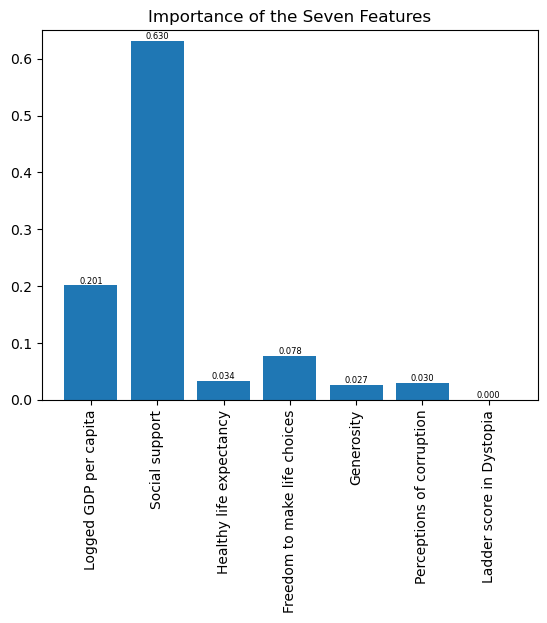

In [213]:
labels = ['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']
fig, ax = plt.subplots()
rects = ax.bar(labels, importances)

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=90)
ax.set_ylim(0, 0.65)
plt.title("Importance of the Seven Features")
plt.show()

In [214]:
X = dataframe[['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia','Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
       'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
       'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe']]
y = dataframe['Ladder score']

rfr = RandomForestRegressor(n_estimators=100, random_state=42)

rfr.fit(X, y)

importances = rfr.feature_importances_

for feature, importance in zip(X.columns, importances):
    print('{} importance: {}'.format(feature, importance))


Logged GDP per capita importance: 0.19876621599963026
Social support importance: 0.6217808709160699
Healthy life expectancy importance: 0.02827120253914904
Freedom to make life choices importance: 0.06720840271906278
Generosity importance: 0.024530193353784438
Perceptions of corruption importance: 0.028203634764176103
Ladder score in Dystopia importance: 0.0
Australia and New Zealand importance: 0.0001264993069710206
Central Asia importance: 7.368257137588177e-05
Eastern Asia importance: 0.001506531746115319
Eastern Europe importance: 0.0004136614720021111
Latin America and the Caribbean importance: 0.01588899515079774
Melanesia importance: 0.0
Micronesia importance: 0.0
Northern Africa importance: 0.000256902307466848
Northern America importance: 2.3048015988380047e-05
Northern Europe importance: 0.00030641181990688276
Polynesia importance: 0.0
South-eastern Asia importance: 0.0005257433061791819
Southern Asia importance: 0.00744695100422059
Southern Europe importance: 0.0006990250196

**TEST FOR DIRECTION AND AMOUNT OF EFFECT OF EACH REGION USING THE RANDOM FOREST**

In [251]:
regions = ['Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
       'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
       'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe']
relevant_features = ['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']

In [252]:
# Test how each region affect the prediction
X_test = [dataframe[feature].mean() for feature in relevant_features]
for i in range(len(regions)):
    X_test.append(0)
X_test_df = pd.DataFrame([X_test], columns=relevant_features+regions)

In [253]:
predictions = []
X_test_df['Melanesia'] = 1
prediction = rfr.predict(X_test_df)
print('Base:', prediction)
predictions.append(prediction)
X_test_df['Melanesia'] = 0
for region in regions:
    X_test_region = X_test_df.copy()
    X_test_region.loc[0, region] = 1
    prediction = rfr.predict(X_test_region)
    print(region, prediction)
    predictions.append(prediction)
    X_test_region.loc[0, region] = 0

Base: [5.38591]
Australia and New Zealand [5.38591]
Central Asia [5.38592]
Eastern Asia [5.40111]
Eastern Europe [5.37473]
Latin America and the Caribbean [5.48073]
Melanesia [5.38591]
Micronesia [5.38591]
Northern Africa [5.38165]
Northern America [5.38591]
Northern Europe [5.38591]
Polynesia [5.38591]
South-eastern Asia [5.38182]
Southern Asia [4.96949]
Southern Europe [5.38419]
Sub-Saharan Africa [5.37642]
Western Asia [5.34113]
Western Europe [5.38591]


In [254]:
predictions = [prediction[0] for prediction in predictions]

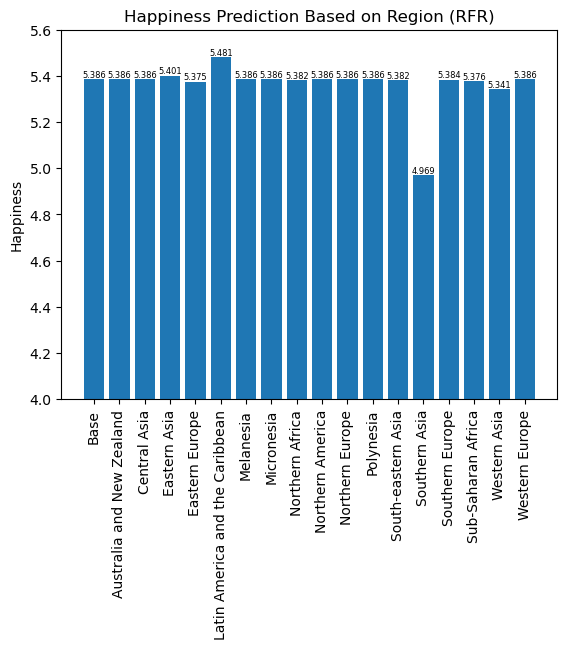

In [255]:
labels = ['Base'] + regions
fig, ax = plt.subplots()
rects = ax.bar(labels, predictions)

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=90)
plt.ylabel("Happiness")
ax.set_ylim(4, 5.6)
plt.title("Happiness Prediction Based on Region (RFR)")
plt.show()

**TEST FOR DIRECTION AND AMOUNT OF EFFECT OF EACH REGION USING A NEURAL NETWORK**

In [202]:
features = ['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
       'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
       'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe']
x = shuffled_dataframe[features].values

In [206]:
model = Sequential()

model.add(Dense(64, input_shape=(24,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

model.fit(x[:100], shuffled_dataframe['Ladder score'][:100], epochs=1000)

# Evaluate the model using the test data (37 items from column x and y)
loss = model.evaluate(x[100:137], shuffled_dataframe['Ladder score'][100:137])
print("Test loss:", loss)


save_model(model, 'model_everything_region.h5')

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.0697
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9749
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0307
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3010
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6240
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7363
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5964
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5841
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5834
Epoch 10/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5988
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5937
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.5893
Epoch 13/1000
4/4 [=============================

In [208]:
regions = ['Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Latin America and the Caribbean', 'Melanesia',
       'Micronesia', 'Northern Africa', 'Northern America', 'Northern Europe',
       'Polynesia', 'South-eastern Asia', 'Southern Asia', 'Southern Europe',
       'Sub-Saharan Africa', 'Western Asia', 'Western Europe']
relevant_features = ['Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']

In [220]:
X_test = [dataframe[feature].mean() for feature in relevant_features]
for i in range(len(regions)):
    X_test.append(0)
X_test_df = pd.DataFrame([X_test], columns=relevant_features+regions)

In [261]:
predictions = []
model = load_model('model_everything_region.h5')

prediction = model.predict(X_test_df)
print('Base:', prediction)
predictions.append(prediction)
for region in regions:
    X_test_region = X_test_df.copy()
    X_test_region.loc[0, region] = 1
    prediction = model.predict(X_test_region)
    print(region, prediction)
    predictions.append(prediction)
    X_test_region.loc[0, region] = 0


1/1 [==============================] - 0s 56ms/step
Base: [[5.7605047]]
1/1 [==============================] - 0s 22ms/step
Australia and New Zealand [[6.293029]]
1/1 [==============================] - 0s 20ms/step
Central Asia [[5.917282]]
1/1 [==============================] - 0s 19ms/step
Eastern Asia [[5.6339192]]
1/1 [==============================] - 0s 21ms/step
Eastern Europe [[5.8963103]]
1/1 [==============================] - 0s 21ms/step
Latin America and the Caribbean [[5.9893656]]
1/1 [==============================] - 0s 23ms/step
Melanesia [[5.759921]]
1/1 [==============================] - 0s 24ms/step
Micronesia [[5.769228]]
1/1 [==============================] - 0s 21ms/step
Northern Africa [[5.041754]]
1/1 [==============================] - 0s 21ms/step
Northern America [[6.437219]]
1/1 [==============================] - 0s 23ms/step
Northern Europe [[6.078412]]
1/1 [==============================] - 0s 22ms/step
Polynesia [[5.662364]]
1/1 [==========================

In [263]:
predictions = [prediction[0][0] for prediction in predictions]

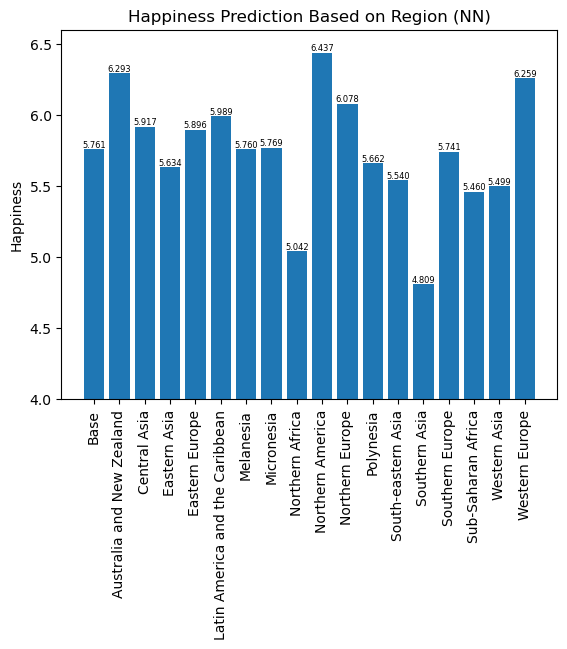

In [264]:
labels = ['Base'] + regions
fig, ax = plt.subplots()
rects = ax.bar(labels, predictions)

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=90)
plt.ylabel("Happiness")
ax.set_ylim(4, 6.6)
plt.title("Happiness Prediction Based on Region (NN)")
plt.show()

**FOR INTRODUCTION**

In [167]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [168]:
def string_similarity(s1, s2):
    char_set = set(s1 + s2)
    common_count = 0
    for char in char_set:
        if char in s1 and char in s2:
            common_count += 1

    return common_count / len(char_set)

In [169]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fill in countries with different names into the dataframe
countries_to_fill = list(set(dataframe['Country name'])-set(world['name']))
target_countries = list(set(world['name'])-set(dataframe['Country name']))
dataframe_copy = dataframe.copy()

for country in countries_to_fill:
    for target in target_countries:
        if country in target or target in country or string_similarity(country, target) > 0.7:
            for i in range(len(dataframe_copy)):
                if dataframe_copy['Country name'][i] == country:
                    dataframe_copy.loc[i, 'Country name'] = target

# Merge the data with the world map based on a common country column
merged_data = world.merge(dataframe_copy[['Country name', 'Ladder score']], left_on='name', right_on='Country name')

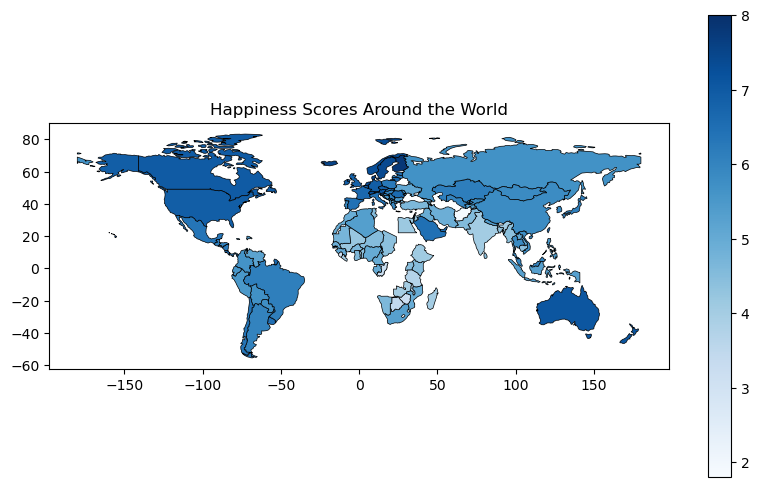

In [170]:
# Set the plot parameters and plot the map

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
merged_data.plot(column='Ladder score', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='black', vmin=1.8, vmax=8,legend=True)
plt.title('Happiness Scores Around the World')
plt.show()

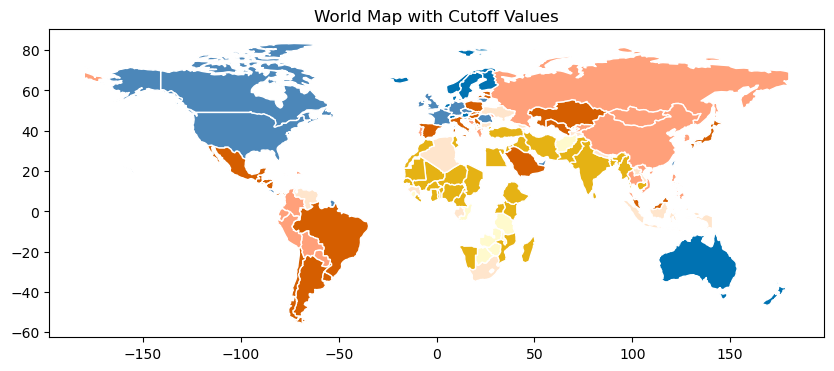

In [171]:
cutoffs = [4, 5, 5.5, 6, 6.5, 7]
colors = ['#FFFACD', '#E5B214', '#FFE5CC', '#FFA07A', '#D55E00', '#4C87B9', '#0072B2']

# create a function to assign colors based on cutoffs
def assign_color(value):
    for i, cutoff in enumerate(cutoffs):
        if value <= cutoff:
            return colors[i]
    return colors[-1]

# apply the function to the data column to assign colors
merged_data['color'] = merged_data['Ladder score'].apply(assign_color)

# plot the world map with colored countries
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(ax=ax, color=merged_data['color'], edgecolor='white')
ax.set_title('World Map with Cutoff Values')
plt.show()

In [172]:
import math
merged_data_GDP = world.merge(dataframe_copy[['Country name', 'Logged GDP per capita']], left_on='name', right_on='Country name')
merged_data_GDP['Logged GDP per capita'] = math.e**merged_data_GDP['Logged GDP per capita']

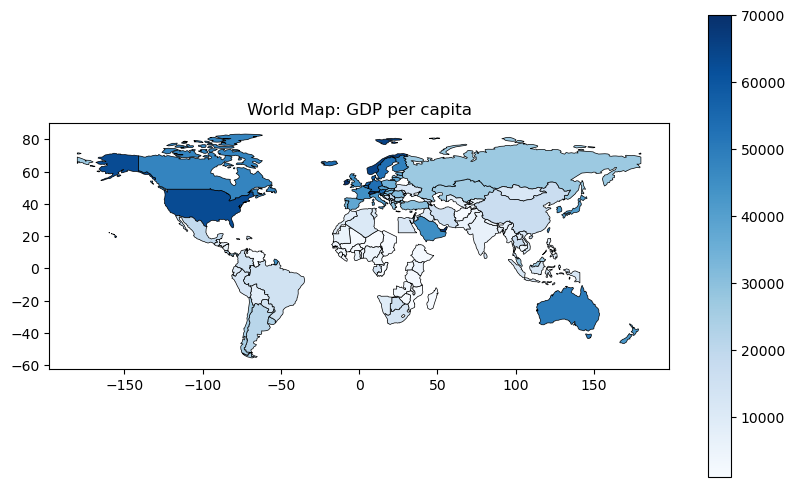

In [173]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
merged_data_GDP.plot(column='Logged GDP per capita', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='black', vmin=1000, vmax=70000,legend=True)
plt.title('World Map: GDP per capita')
plt.show()